In [1]:
%%time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
X, y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000/70000)

Wall time: 20.7 s


In [7]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

Wall time: 36.3 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
%%time 
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, rf_clf.predict(X_test)))

0.9677
Wall time: 350 ms


In [15]:
%%time
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) #95% explained variance
X_t_reduced = pca.fit_transform(X_train)
X_v_reduced = pca.transform(X_test)

Wall time: 3.7 s


In [20]:
%%time

rf_clf_R = RandomForestClassifier()
rf_clf_R.fit(X_t_reduced, y_train)

Wall time: 1min 16s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
print(accuracy_score(y_test, rf_clf.predict(X_v_reduced)))

0.9452


In [9]:
from sklearn.manifold import TSNE

cap = 1000

tsne = TSNE(n_components=2)
mnist_reduced = tsne.fit_transform(X[:cap])

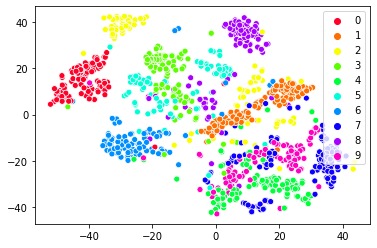

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#plt.scatter(mnist_reduced[:, 0], mnist_reduced[:, 1], c=y[:cap])
sns.scatterplot(mnist_reduced[:, 0], mnist_reduced[:, 1], hue=y[:cap], legend='full', palette="gist_rainbow")
plt.show()

In [6]:
mnist_reduced[:, 1]

array([-94.004585,  10.595781, -28.669699,  29.1657  , -85.25804 ,
        75.933075,  17.182747,  67.18428 , -35.255886, -47.237015],
      dtype=float32)

In [5]:
mnist_reduced

array([[-17.476082 , -94.004585 ],
       [-48.109444 ,  10.595781 ],
       [ 69.76863  , -28.669699 ],
       [ 86.95376  ,  29.1657   ],
       [ 48.84075  , -85.25804  ],
       [ 39.12872  ,  75.933075 ],
       [ 19.562063 ,  17.182747 ],
       [-27.187384 ,  67.18428  ],
       [  2.0949392, -35.255886 ],
       [-65.30025  , -47.237015 ]], dtype=float32)